In [1]:
import numpy as np
import matplotlib.pyplot as plt

from wows_shell import *


In [2]:
def get_camera_angle(x):
    x_km = x/1000
    height = 1.1972*x_km*x_km + 14.595*x_km
    angle = np.arctan(height/x)
    return angle

#s = shell(shellParams(.220, 985, .2549, 176.0, 2590, 7.0, .033, 37, 45, 60.0, 0), "Moskva")
s = shell(shellParams(.460, 780, .292, 1460, 2574, 6, .033, 76, 45, 60, 0), "Yamato")
c = shellCalc()
c.setMax(10)
c.calcImpactForwardEuler(s, addTraj=True)

impact = s.getImpact()
print(impact)

distances = impact[int(impactIndices.distance), :]
camera_angles = np.degrees(get_camera_angle(distances))

[[ 3.11950457e+01  2.33480874e+02  4.50397295e+02 ...  1.65934408e+04
   1.67245759e+04  1.68553391e+04]
 [ 0.00000000e+00  1.00000000e-01  2.00000000e-01 ...  9.80000000e+00
   9.90000000e+00  1.00000000e+01]
 [-5.02803545e-04 -2.03348202e-03 -3.83125693e-03 ... -2.10862766e-01
  -2.13229926e-01 -2.15604497e-01]
 ...
 [ 8.99711915e+01  8.98834901e+01  8.97804851e+01 ...  7.79184534e+01
   7.77828252e+01  7.76467723e+01]
 [ 4.48229266e-01  1.80173498e+00  3.37247384e+00 ...  1.17024364e+02
   1.17955735e+02  1.18886771e+02]
 [ 9.36287135e+01  9.44075494e+01  9.53649995e+01 ...  1.73532028e+02
   1.74254183e+02  1.74977790e+02]]


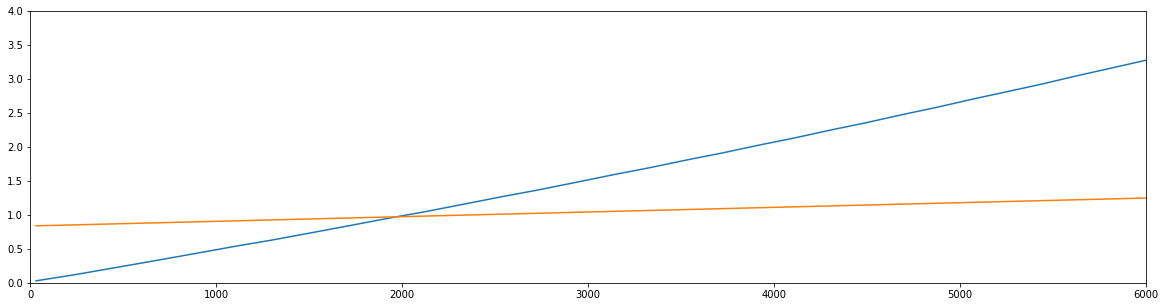

In [3]:
plt.rcParams['figure.figsize'] = [20, 5]

fig, ax = plt.subplots(1,1)

ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
ax.set_xlim(0, 6000)
ax.set_ylim(0, 4)

ax.plot(distances, impact[int(impactIndices.impactAngleHorizontalDegrees)])
ax.plot(distances, camera_angles)

plt.show()